In [4]:
import numpy as np
import naima
import astropy.units as u
from astropy.io import ascii
from naima.models import PionDecay, PowerLaw, ExponentialCutoffPowerLaw
import matplotlib as mpl
import matplotlib.pyplot as plt

In [33]:
#using dummy amplitudes for the protons here, will set total proton energy later.
#define two proton spectra, one power law (PL) and one power law with exponential cutoff.
#note: use *positive* indices for PL spectra in naima. 

protonsPL = PowerLaw( amplitude = 1.0/u.eV, e_0 = 1 * u.TeV, alpha = 2.0)
protonsCutoff = ExponentialCutoffPowerLaw( amplitude = 1.0/u.eV, 
                                          e_0 = 1 * u.TeV, alpha = 2.0, e_cutoff = 5 * u.TeV)

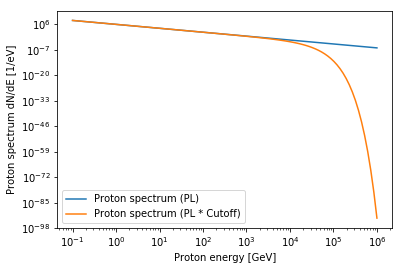

In [34]:
#plot proton spectra (just to see what they look like)

#energies at which we want to evaluate the spectrum
Eprotons = np.logspace(-1, 6, 100) * u.GeV

%matplotlib inline

plt.loglog(Eprotons, protonsPL(Eprotons), label="Proton spectrum (PL)")
plt.loglog(Eprotons, protonsCutoff(Eprotons), label="Proton spectrum (PL * Cutoff)")
plt.ylabel("Proton spectrum dN/dE [1/eV]")
plt.xlabel("Proton energy [GeV]")
plt.legend()


In [35]:
#to illustrate the use of units and how to access the spectra.
#naima models are phyical and accept/return astropy quantities.
#Try: protonsPL( 2.0 ) without a unit...
for E in [ 1*u.GeV, 1000*u.GeV, 1*u.TeV]:
    print("dN/dE(", E, ") = ", protonsPL(E) )



dN/dE( 1.0 GeV ) =  1000000.0 1 / eV
dN/dE( 1000.0 GeV ) =  1.0 1 / eV
dN/dE( 1.0 TeV ) =  1.0 1 / eV


In [45]:
#now, to get the gamma-ray emission from those protons.

pionsPL = PionDecay(particle_distribution=protonsPL,
                   nh= 1. / u.cm**3, nuclear_enhancement= True,
                   Epmin = 1.22*u.GeV, Epmax= 10*u.PeV, nEpd=100, hiEmodel="Pythia8" )
pionsCutoff = PionDecay(particle_distribution=protonsCutoff,
                   nh= 1. / u.cm**3, nuclear_enhancement= True,
                   Epmin = 1.22*u.GeV, Epmax= 10*u.PeV, nEpd=100, hiEmodel="Pythia8" )
#these are the default parameters... play around with them to see how they change the model.

#set normalization by fixing the total proton energy. For some reason, this is done 
#via the pion decay spectrum.
pionsPL.set_Wp(10**50 * u.erg)
pionsCutoff.set_Wp(10**50 * u.erg)

#units check...
print "Flux dN/dE:", pionsPL.flux([1]*u.TeV, distance=2*u.kpc)
print "SED E^2dN/dE:", pionsPL.sed([1]*u.TeV, distance=2*u.kpc)


Flux dN/dE: [2.98648052e-24] 1 / (cm2 eV s)
SED E^2dN/dE: [4.78486927e-12] erg / (cm2 s)


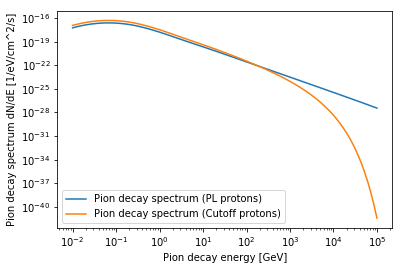

In [43]:
#gamma-ray flux dN/dE

#energies at which we want to evaluate the spectrum
#what happens below 10 MeV?
Egamma = np.logspace(-2, 5, 100) * u.GeV

#source distance
D=2*u.kpc

%matplotlib inline

plt.loglog(Egamma, pionsPL.flux(Egamma, distance=D), label="Pion decay spectrum (PL protons)")
plt.loglog(Egamma, pionsCutoff.flux(Egamma, distance=D), label="Pion decay spectrum (Cutoff protons)")
plt.ylabel("Pion decay spectrum dN/dE [1/eV/cm^2/s]")
plt.xlabel("Pion decay energy [GeV]")
plt.legend()

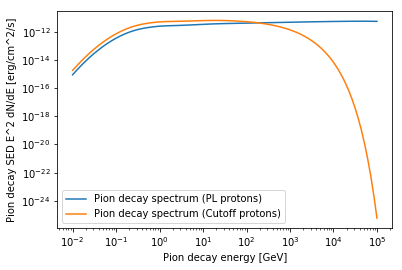

In [49]:
#gamma-ray SED E^2 dN/dE

#energies at which we want to evaluate the spectrum
#what happens below 10 MeV?
Egamma = np.logspace(-2, 5, 100) * u.GeV

#source distance
D=2*u.kpc

%matplotlib inline

plt.loglog(Egamma, pionsPL.sed(Egamma, distance=D), label="Pion decay spectrum (PL protons)")
plt.loglog(Egamma, pionsCutoff.sed(Egamma, distance=D), label="Pion decay spectrum (Cutoff protons)")
plt.ylabel("Pion decay SED E^2 dN/dE [erg/cm^2/s]")
plt.xlabel("Pion decay energy [GeV]")
plt.legend()